#Import Libraries

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

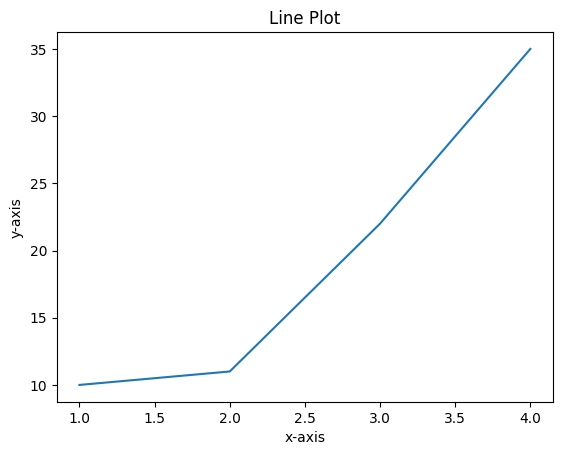

In [14]:
x = [1,2, 3, 4]
y = [10, 11, 22, 35]
plt.plot(x,y)
plt.title('Line Plot')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

1) pie chart
2) histograms
3) scatte plot
4) bar graph

tasks:
1) add columns in dataset which have scope of visualization
2) find logic of reshape and slicing reverse
3) improve github repo with readme
4) data manipulation using loc and iloc in one liners

1) needs the revenue product wise
2) needs the sales graph day wise
3) needs the observations(unique product pie chart sales)

#Technically
1) import the excel file
2) check for the null values or duplicate values
3) calculate the revenue using numpy
4) add revenue column(unit*price) in df
5) generate plots (bar, line, pie) for salwes data with using to_datetime

#Read data file

In [15]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset_files/student_dataset_with_visualization.csv")
df

,ID,Name,Marks,Subject,Grade,Gender,Attendance_Percent,Study_Hours_Per_Week,Passed
0,1,Alex,85.0,Math,A,Male,81,8,Yes
1,2,Emma,78.0,Science,B,Female,61,19,Yes
2,3,Liam,90.0,Math,A,Male,83,5,Yes
3,4,Sophia,65.0,English,C,Male,89,15,Yes
4,5,Noah,88.0,Science,A,Male,97,19,Yes
5,6,Mia,72.0,Math,B,Female,61,10,Yes
6,7,James,60.0,English,C,Male,80,3,Yes
7,8,Olivia,95.0,Science,A,Male,92,16,Yes
8,9,Ethan,NaN,Math,B,Male,71,8,No
9,10,Emily,70.0,English,B,Female,81,13,Yes


#Check for null and duplicate values

In [16]:
df.isnull().sum()

,0
ID,0
Name,0
Marks,2
Subject,0
Grade,0
Gender,0
Attendance_Percent,0
Study_Hours_Per_Week,0
Passed,0


In [17]:
print('Number of duplicate rows:')
display(df.duplicated().sum())

Number of duplicate rows:


np.int64(0)

#Replace null values with the mean value

In [18]:
mean_marks = df['Marks'].mean()
df['Marks'] = df['Marks'].fillna(mean_marks)
print('Null values after replacement')
display(df.isnull().sum())

Null values after replacement


,0
ID,0
Name,0
Marks,0
Subject,0
Grade,0
Gender,0
Attendance_Percent,0
Study_Hours_Per_Week,0
Passed,0


In [19]:
print('DataFrame after replacement:')
display(df.head(20))

DataFrame after replacement:


,ID,Name,Marks,Subject,Grade,Gender,Attendance_Percent,Study_Hours_Per_Week,Passed
0,1,Alex,85.000000,Math,A,Male,81,8,Yes
1,2,Emma,78.000000,Science,B,Female,61,19,Yes
2,3,Liam,90.000000,Math,A,Male,83,5,Yes
3,4,Sophia,65.000000,English,C,Male,89,15,Yes
4,5,Noah,88.000000,Science,A,Male,97,19,Yes
5,6,Mia,72.000000,Math,B,Female,61,10,Yes
6,7,James,60.000000,English,C,Male,80,3,Yes
7,8,Olivia,95.000000,Science,A,Male,92,16,Yes
8,9,Ethan,77.277778,Math,B,Male,71,8,No
9,10,Emily,70.000000,English,B,Female,81,13,Yes


# Graph by Gender vs Avg. attendance

In [26]:
gender_attendance = df.groupby('Gender')['Attendance_Percent'].mean()
print(gender_attendance)


Gender
Female    74.142857
Male      81.153846
Name: Attendance_Percent, dtype: float64


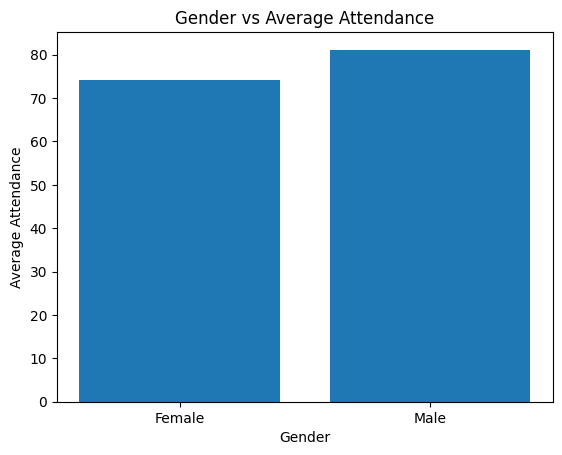

In [27]:
plt.bar(gender_attendance.index, gender_attendance.values)
plt.xlabel('Gender')
plt.ylabel('Average Attendance')
plt.title('Gender vs Average Attendance')
plt.show()

#Bar chart for avg marks in each subject

In [28]:
average_marks = df.groupby('Subject')['Marks'].mean()
print(average_marks)

Subject
English    68.055556
Math       75.659722
Science    85.714286
Name: Marks, dtype: float64


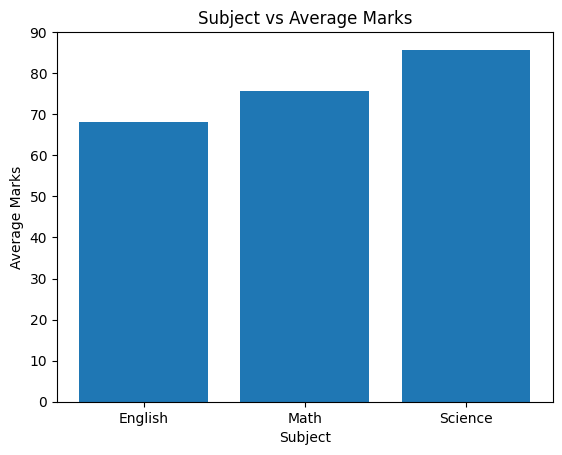

In [29]:
plt.bar(average_marks.index, average_marks.values)
plt.xlabel('Subject')
plt.ylabel('Average Marks')
plt.title('Subject vs Average Marks')
plt.show()

#Pie chart for Proportion of Grades by students for each subjects

In [33]:
students_grade = df.groupby(['Subject','Grade'])['ID'].count().unstack()
print(students_grade)

Grade      A    B    C
Subject               
English  NaN  2.0  3.0
Math     3.0  4.0  1.0
Science  4.0  3.0  NaN


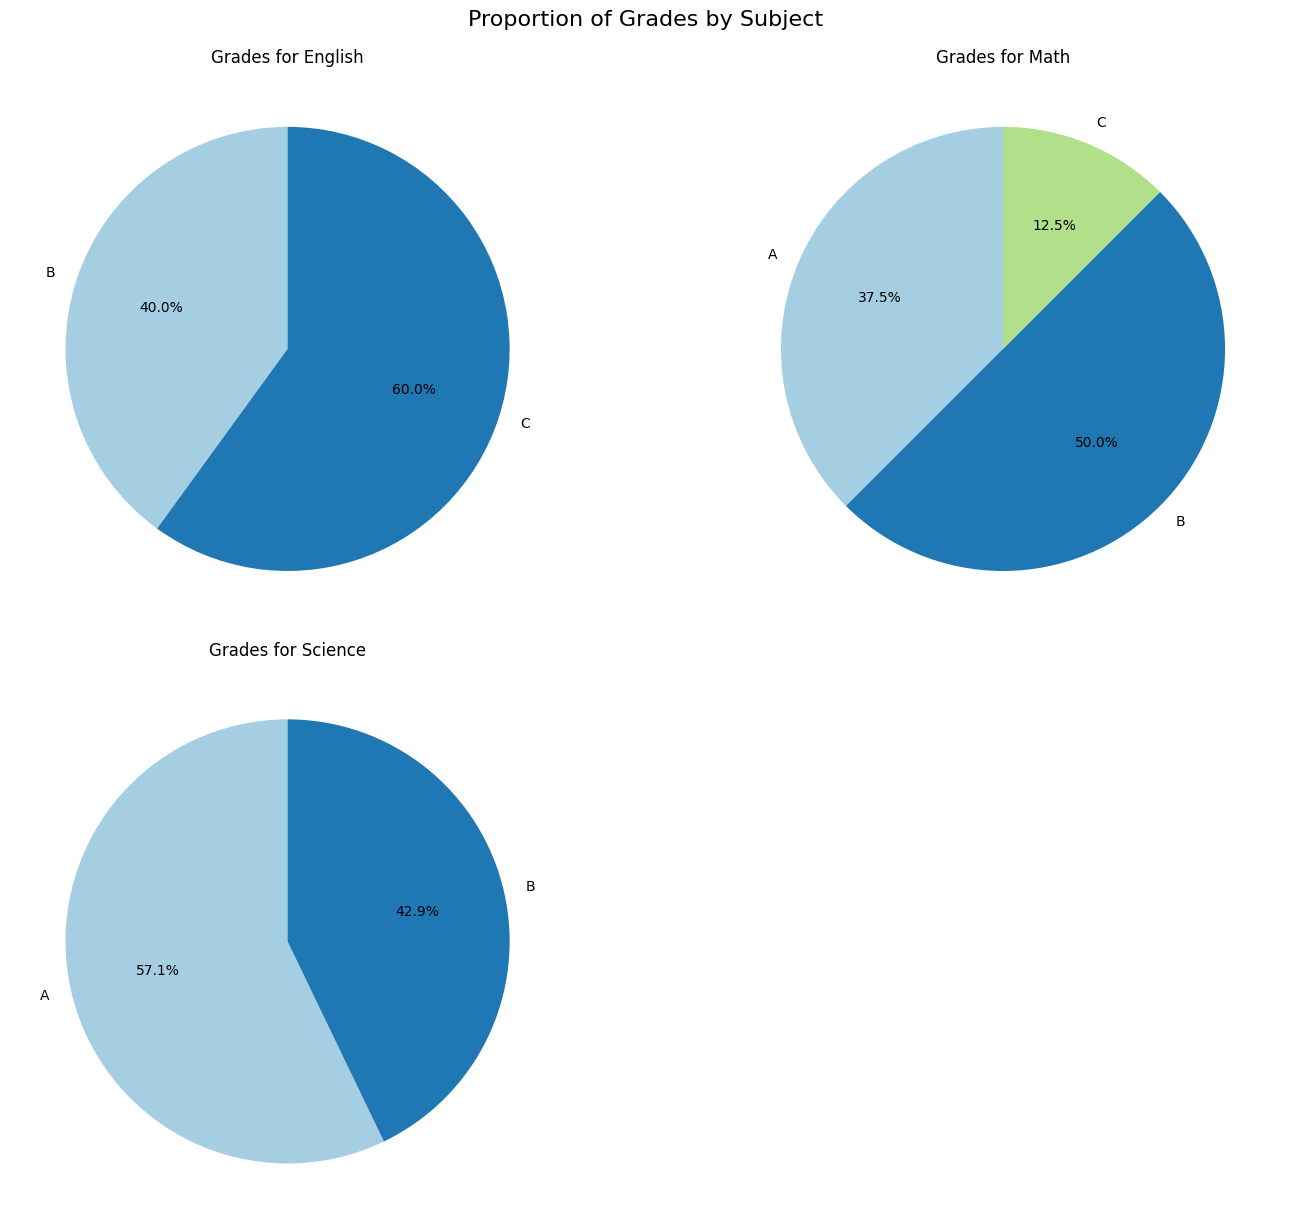

In [34]:
num_subjects = len(students_grade)
num_cols = 2
num_rows = (num_subjects + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 6))
axes = axes.flatten() # Flatten the 2D array of axes

for i, (subject, grades) in enumerate(students_grade.iterrows()):
    # Drop NaN values
    grades_data = grades.dropna()

    if not grades_data.empty:
        axes[i].pie(grades_data.values,
                    labels=grades_data.index,
                    autopct='%1.1f%%',
                    startangle=90,
                    colors=plt.cm.Paired(range(len(grades_data.index))))
        axes[i].set_title(f'Grades for {subject}')
    else:
        # If no grades exist for a subject, hide the subplot
        fig.delaxes(axes[i])

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Proportion of Grades by Subject', y=1.02, fontsize=16)
plt.show()